In [1]:
from LearningExperiment.Learning_exp import Bicycle_Model, mpc_rollout, train_on_segment_df, build_coc_from_env
from LearningExperiment.util import RoutePredictor
import pandas as pd
import numpy as np

In [2]:
dt = 0.1
vehicle_data = pd.read_csv("../LearningExperiment/vehicle_log_straight.csv")
rp = RoutePredictor("../LearningExperiment/route_points.csv")
v = vehicle_data['v'].to_numpy()
a = np.zeros_like(v)
a[1:] = np.diff(v) / dt
vehicle_data['a'] = a

# Build env/COC once
env = Bicycle_Model()
env.initDyn()
env.initCost()
env.initConstraints()
gamma = 1e-2
coc = build_coc_from_env(env, dt=dt, gamma=gamma)

init_parameter = (16, 16, 4, 8, 2, 1, 0.5, 1, 14, 1)

iter #   0: FastDOC: loss=301.261704 | IDOC: 301.261704 | SafePDP: 301.261704 | lr=0.0100
iter #   1: FastDOC: loss=256.256478 | IDOC: 256.253984 | SafePDP: 256.253984 | lr=0.0100
iter #   2: FastDOC: loss=255.269202 | IDOC: 254.733863 | SafePDP: 254.733863 | lr=0.0100
iter #   3: FastDOC: loss=254.275433 | IDOC: 253.179397 | SafePDP: 253.179397 | lr=0.0100
iter #   4: FastDOC: loss=253.275556 | IDOC: 251.590092 | SafePDP: 251.590092 | lr=0.0100
iter #   5: FastDOC: loss=252.270043 | IDOC: 249.965552 | SafePDP: 249.965552 | lr=0.0100
iter #   6: FastDOC: loss=251.259484 | IDOC: 248.306319 | SafePDP: 248.306319 | lr=0.0100
iter #   7: FastDOC: loss=250.244604 | IDOC: 246.614740 | SafePDP: 246.614740 | lr=0.0100
iter #   8: FastDOC: loss=249.226295 | IDOC: 244.897408 | SafePDP: 244.897408 | lr=0.0100
iter #   9: FastDOC: loss=248.205659 | IDOC: 243.169024 | SafePDP: 243.169024 | lr=0.0100
iter #  10: FastDOC: loss=247.184058 | IDOC: 241.449399 | SafePDP: 241.449399 | lr=0.0100
iter #  11

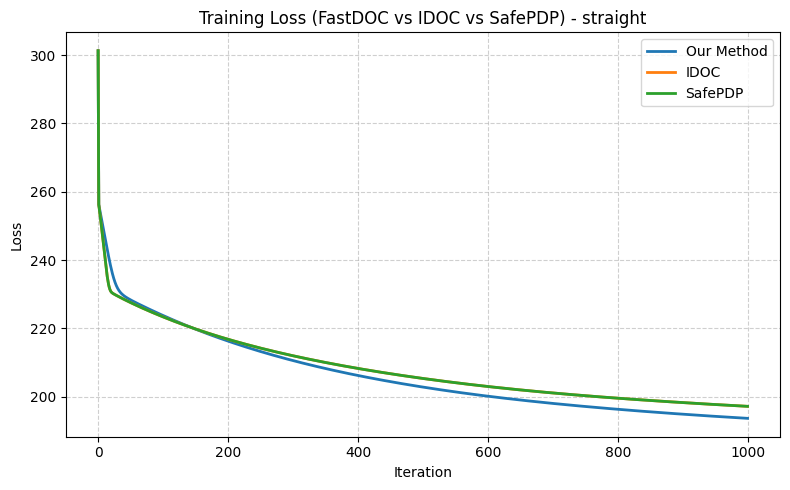

Avg build time | FastDOC: 1.842995e-03s, IDOC: 1.913318e-03s, SafePDP: 1.829133e-03s (over 80000 samples)
Avg solve time | FastDOC: 5.993181e-04s, IDOC: 1.148329e-03s, SafePDP: 9.356337e-04s (over 80000 samples)
Saved PNG: learning_result\loss_curves_all_straight.png
Saved NPZ: learning_result\training_results_all_straight.npz


In [3]:
train_on_segment_df(
        roadname="straight",
        vehicle_data=vehicle_data,
        rp=rp,
        coc=coc,
        start_index=100,
        end_index=180,
        horizon=5,
        dt=dt,
        init_parameter=init_parameter,
        max_iter=1000,
        lr=0.01,
        seed=100
)

In [4]:
vehicle_data = pd.read_csv("../LearningExperiment/vehicle_log_curve.csv")
v = vehicle_data['v'].to_numpy()
a = np.zeros_like(v)
a[1:] = np.diff(v) / dt
vehicle_data['a'] = a

iter #   0: FastDOC: loss=189.588864 | IDOC: 189.588864 | SafePDP: 189.588864 | lr=0.0010
[IPOPT] Solve failed: Maximum_Iterations_Exceeded (iters=3000)
[IPOPT] Solve failed fallback used: Maximum_Iterations_Exceeded (iters=3000)
iter #   1: FastDOC: loss=139.001659 | IDOC: 134.750839 | SafePDP: 134.750839 | lr=0.0010
iter #   2: FastDOC: loss=123.136539 | IDOC: 118.625887 | SafePDP: 118.625887 | lr=0.0010
iter #   3: FastDOC: loss=113.652292 | IDOC: 109.242260 | SafePDP: 109.242260 | lr=0.0010
iter #   4: FastDOC: loss=107.089336 | IDOC: 102.855721 | SafePDP: 102.855721 | lr=0.0010
iter #   5: FastDOC: loss=102.157903 | IDOC: 98.158884 | SafePDP: 98.158884 | lr=0.0010
iter #   6: FastDOC: loss=98.261642 | IDOC: 94.532217 | SafePDP: 94.532217 | lr=0.0010
iter #   7: FastDOC: loss=95.073539 | IDOC: 91.604058 | SafePDP: 91.604058 | lr=0.0010
iter #   8: FastDOC: loss=92.385778 | IDOC: 89.179358 | SafePDP: 89.179358 | lr=0.0010
[IPOPT] Solve failed: Maximum_Iterations_Exceeded (iters=3000

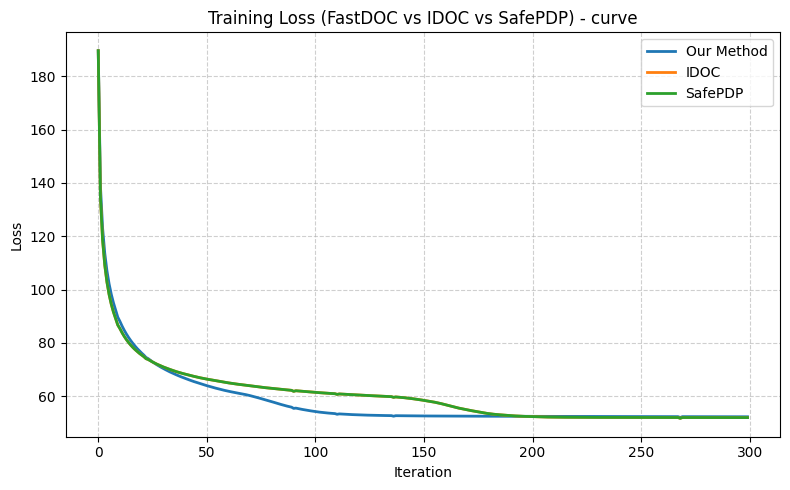

Avg build time | FastDOC: 1.826352e-03s, IDOC: 1.902227e-03s, SafePDP: 1.811984e-03s (over 53993 samples)
Avg solve time | FastDOC: 5.967575e-04s, IDOC: 1.170806e-03s, SafePDP: 9.265944e-04s (over 53993 samples)
Saved PNG: learning_result\loss_curves_all_curve.png
Saved NPZ: learning_result\training_results_all_curve.npz


In [5]:
train_on_segment_df(
        roadname="curve",
        vehicle_data=vehicle_data,
        rp=rp,
        coc=coc,
        start_index=0,
        end_index=180,
        horizon=5,
        dt=dt,
        init_parameter=init_parameter,
        max_iter=300,
        lr=0.001,
        seed=100
)

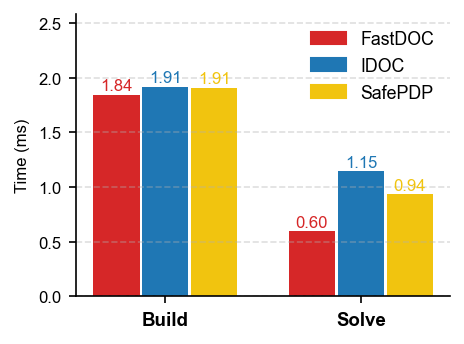

[plot_time_bars] saved: learning_result\time_bars_grouped_training_results_all_straight.svg


<Figure size 640x480 with 0 Axes>

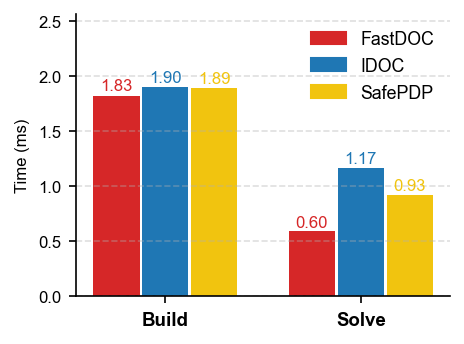

[plot_time_bars] saved: learning_result\time_bars_grouped_training_results_all_curve.svg
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_1.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_2.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_5.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_10.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_20.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_40.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_60.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_80.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_100.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_200.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_400.csv
[cache hi

<Figure size 640x480 with 0 Axes>

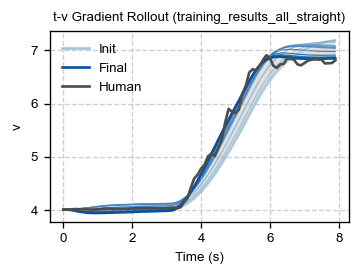

[rollout_and_compare] saved gradient rollout: learning_result\rollout_training_results_all_straight\mpc_eval_t_v_grad.svg
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_1.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_2.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_5.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_10.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_20.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_40.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_60.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_80.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_100.csv
[cache hit] learning_result\rollout_training_results_all_straight\csv\step_200.csv
[cache hit] learning_result\rollout_training_results_all_st

<Figure size 640x480 with 0 Axes>

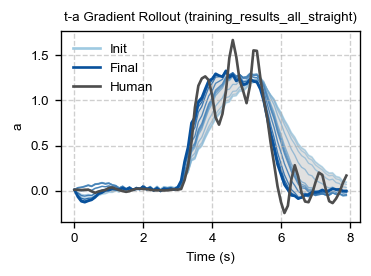

[rollout_and_compare] saved gradient rollout: learning_result\rollout_training_results_all_straight\mpc_eval_t_a_grad.svg
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_1.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_2.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_5.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_10.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_20.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_40.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_60.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_80.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_100.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_200.csv
[cache hit] learning_result\rollout_training_results_all_curve\csv\step_299.csv


<Figure size 640x480 with 0 Axes>

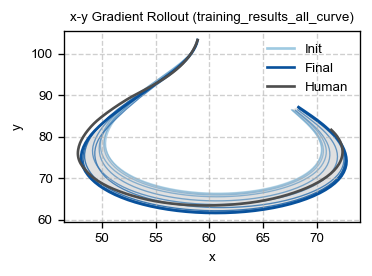

[rollout_and_compare] saved gradient rollout: learning_result\rollout_training_results_all_curve\mpc_eval_x_y_grad.svg


<Figure size 640x480 with 0 Axes>

In [6]:
from LearningExperiment import Learning_plot

straight_path = "./learning_result/training_results_all_straight.npz"
curve_path = "./learning_result/training_results_all_curve.npz"
Learning_plot.plot_time_bars(straight_path)
Learning_plot.plot_time_bars(curve_path)

vehicle_straight_csv = "../LearningExperiment/vehicle_log_straight.csv"
vehicle_curve_csv = "../LearningExperiment/vehicle_log_curve.csv"
route_csv = "../LearningExperiment/route_points.csv"

Learning_plot.rollout_and_compare(straight_path, vehicle_straight_csv, route_csv, x_variable="t", y_variable="v")
Learning_plot.rollout_and_compare(straight_path, vehicle_straight_csv, route_csv, x_variable="t", y_variable="a")
Learning_plot.rollout_and_compare(curve_path, vehicle_curve_csv, route_csv, x_variable="x", y_variable="y")